In [1]:
%run util.ipynb
import networkx as nx

In [2]:
maze = get_test(20,2)
maze = get_puzzle(20)
maze = list(map(list,maze))

In [15]:
isLetter = lambda i,j: ord(maze[i][j])>=65
isPath = lambda i,j: maze[i][j] == '.'

portals = set()
portalPoints = defaultdict(list)
for i in range(len(maze)-1):
    for j in range(len(maze[i])-1):
        if isLetter(i,j):
            if isLetter(i,j+1):
                portal = maze[i][j]+maze[i][j+1]
                portals.add(portal)
                if isPath(i,j-1):
                    newJ = j-1
                elif isPath(i,j+2):
                    newJ = j+2
                portalPoints[portal].append(P(i,newJ))
            elif isLetter(i+1,j):
                portal = maze[i][j]+maze[i+1][j]
                portals.add(portal)
                if isPath(i-1,j):
                    newI = i-1
                elif isPath(i+2,j):
                    newI = i+2
                portalPoints[portal].append(P(newI,j))
    
pointPortals = defaultdict(str)
for name, points in portalPoints.items():
    for p in points:
        pointPortals[p] = name

In [8]:
dirs = (P(1,0),P(0,1),P(-1,0),P(0,-1))
def options(cave, pos):
    res = []
    for d in dirs:
        p = pos+d
        if isPath(p.x,p.y) == '.' or isLetter(p.x,p.y):
            res.append(p)
            
    return res

def traverse(maze, pos, prev=None, start='AA', steps=0):
    if prev is None:
        prev = pos
    
    if pos in pointPortals:
        newPortal = pointPortals[pos]
        if newPortal != '' and newPortal != start:
            #print('found portal', start, newPortal, steps)
            if not G.has_edge(start, newPortal) or steps < G.edges[start, newPortal]['steps']:
                G.add_edge(start, newPortal, steps=steps)

    opts = options(maze, pos)
    if len(opts) == 1:
        return
    for opt in opts:
        if opt == prev:
            continue
        if maze[opt.x][opt.y] == '.':
            traverse(maze, opt, pos, start, steps+1)

In [9]:
def draw_g(G):
    nodeLabels = nx.get_node_attributes(G, 'gate')
    pos=nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True, labels=nodeLabels, node_color='lightblue')
    
    edgeLabels = nx.get_edge_attributes(G,'steps')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edgeLabels)
    

def draw(cave, pos):
    old, cave[pos.x][pos.y] = cave[pos.x][pos.y],'@'
    print('\n'.join(''.join(c) for c in cave))
    cave[pos.x][pos.y] = old

In [11]:
G = nx.Graph()
for name in portals:
    G.add_node(name, gate=name)
for name, points in portalPoints.items():
    for p in points:
        traverse(maze,p,start=name)

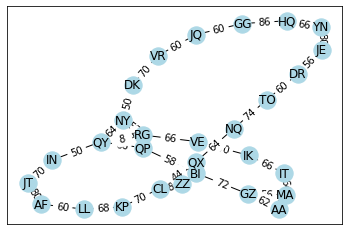

In [12]:
draw_g(G)

In [16]:
def path_length(G, p):
    return sum(G.edges[u,v]['steps'] for u,v in zip(p,p[1:])) + len(p) - 2

min(path_length(G, p) for p in nx.all_simple_paths(G,'AA', 'ZZ'))

674